# ABM - model virálního marketingu

*KMA/MAE2*

*Jan Půlpán*

In [1]:
import numpy as np
import ipywidgets as widgets
from abm import wom

Model který si ukážeme modeluje virální marketing. Představit si můžeme třeba šíření reklamního videa na internetu, nebo tzv. "word-of-mouth" šíření informace o produktu mezi lidmi. Cílem marketérů je šířit povědomí o svém produktu samovolně, bez jejich přispění. Úspěšná virální kampaň je taková, která nastartuje masové šíření zprávy. To ale není vůbec jednoduché. Model tedy zkoumá na základě jakých předpokladů se zpráva začne v síti masově šířit.

JE TO VLASTNĚ EPIDEMIOLOGICKÝ PRAHOVÝ MODEL - GRANOVETTER 1978

Opět se jedná o 3 stavový model, podobně jako Greenbergův-Hastingsův model nebo SIR. Jednotlivce (agenty) řadíme do těchto 3 přihládek:
- **S**usceptible - náchylní, zpráva se k nim ještě nedostala, označeni modře
- **L**atent - latentní, nečinní, zpráva se k nim dostala, ale dostatečně je nezajímá, dál ji nešíří, označeni oranžově
- **A**ctive - aktivní, dále šířící, označeni červeně

Model pracuje opět na mřížce, kterou jsme vybrali kvůli rychlosti běhu algoritmu. Všechny buňky na mřížce nejsou ale obsazeny agenty. Tyto prázdné buňky jsou ve znázornění bílé.

In [35]:
model1 = wom(agents=.8, threshold=(.20,.1), net_dim=30)
model1.simulate(iters = 100)
interactive_plot = widgets.interactive(model1.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=model1.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t'), Checkbox(value=False, description='labels'), Output…

## Inicializace modelu

Model musíme nejprve inicializovat. Vytvoříme síť agentů, některé buňky nejsou obsazené a zůstávají prázdné. Množství agentů v modelu je dáno parametrem $agents \in [0,1]$. V modelu počítáme s 3-okolím ve všech směrech. Jeden agent může mít tedy maximálně 48 sousedů.

<center><img src='3okoli.png'></center>

Každému agentu $a$ přiřadíme práh $T(a)$, který určuje jeho ochotu přepnout z jednoho stavu do druhého. Práh je vlastně funkce osoby samotné (agenta), jejího prostředí a okolností.  

$$T(a) = f(\text{Agent, Prostředí, Okolnosti})$$  
Ve skutečném světě je tyto vlastnosti agentů velmi složité stanovit. My je vygenerujeme náhodně (z normálního rozdělení se střední hodnotou $\mu$ a rozptylem $\sigma^2$) jako číslo mezi 0 a 1. 

## Dynamické chování

V tomto konkrétním modelu pracujeme v každém kroku s celou síťí, ne jen s jednotlivým (náhodně vybraným) agentem jako při asynchronní dynamice.

Jednotlivé přihrádky označíme čísly:
- **S**usceptible ... $1$,
- **L**atent ... $2$,
- **A**ctive ... $3$.

Prázdnou buňku označíme $0$.

Definujeme poměr aktivních sousedů (v přihrádce $A$) oproti všem sousedům

$$ \sigma(a) = \frac{\text{# A sousedů}}{\text{# všech sousedů}}$$

S pomocí $\sigma(a)$ definujeme následující dynamické pravidlo

$$ \left.f\left( a \right|_{U_3(a)} \right) = \begin{cases} 3 \text{ jestliže } 0 \leq T(a) < \sigma(a),\\ 
2 \text{ jestliže } 0 < \sigma(a) < T(a),\\
1 \text{ jinak, }\end{cases}$$

## Zkoumaná otázka a parametry

Otázka která zajímá marketéry je, zda ve zkoumaném modelu vznikne masové šíření zprávy. Pomocí similací popsaného modelu sledovali následující parametry a jejich vliv na vznik šíření nebo naopak na jeho zastavení.

Intiutivně má vliv *počáteční podmínka*. V našem případě tedy počet a rozložení iniciálních agentů, tzv iniciátorů. Počet je důležitý, ale ukážene si, že ještě důležitější je jejich hustota a blízkost. Samozřejmým parametrem je pak i *hustota celé populace*. Pokud je populace v modelu zahuštěnější (ne nutně to musí znamenat v prostoru, na sociálních sítích je to blízkost pomocí sledování) zpráva se samozřejmě snadněji šíří. A posledním parametrem který nás bude zajímat je *práh* jednotlivých agentů. 


------ TADY POKRAČOVAT

Threshold
- tím že ho snížím snížím samozřejmě šanci na masové šíření
- tato závislost není ale lineární - i malá změna thresholdu může hodně změnit to, zda se bude masově šířit

Počáteční podmínka - blízkost a hustota iniciátorů
- pokud jsou hodně rozházeni - ovlivní jen ty s velmi nízkým thresholdem
- pokud jsou pohromadě, mohou ovlivnit víc okolních agentů. Je zde ale zase riziko že se z inicitorů vyvine uzavřená skupina

## Koncentrovaní iniciátoři, nízký threshold

'Průměrný threshold: 0.17250912041913183'

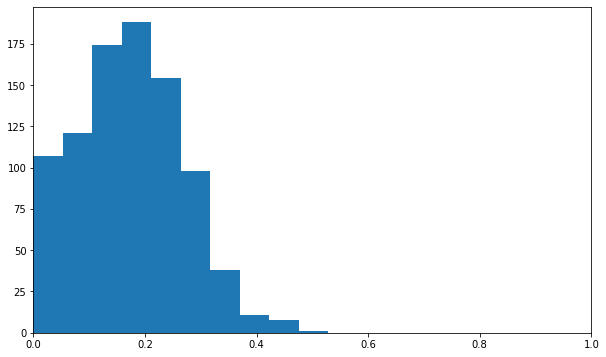

In [3]:
model2 = wom(agents=.8, threshold=(.17,.1), net_dim=30)
model2.simulate(iters = 200, ic=((10,10,3),))

model2.describe_model()

In [4]:
interactive_plot = widgets.interactive(model2.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=model2.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t', max=200), Checkbox(value=False, description='labels'…

## Koncentrovaní iniciátoři, vysoký threshold

'Průměrný threshold: 0.245889047055364'

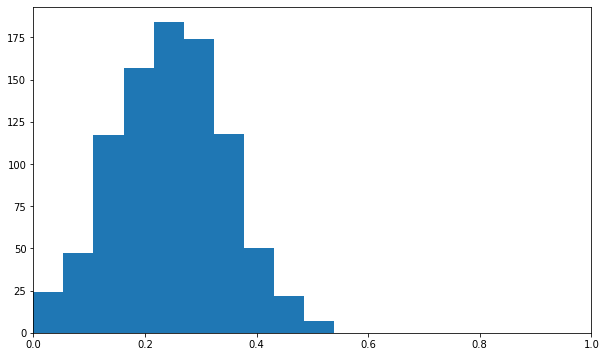

In [6]:
model3 = wom(agents=.8, threshold=(.25,.1), net_dim=30)
model3.simulate(iters = 100, ic=((10,10,3),))
model3.describe_model()

In [7]:
interactive_plot = widgets.interactive(model3.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=model3.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t'), Checkbox(value=False, description='labels'), Output…

## Roztroušení iniciátoři, nizký threshold

'Průměrný threshold: 0.17235703171440275'

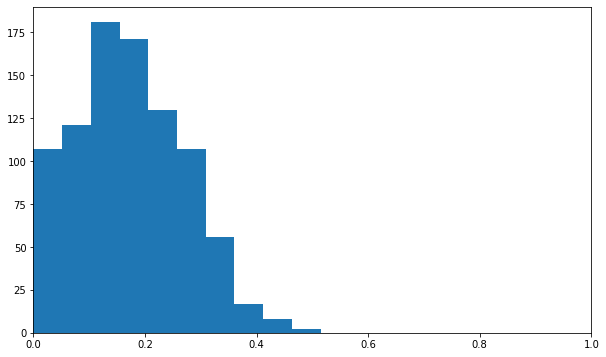

In [17]:
model4 = wom(agents=.8, threshold=(.17,.1), net_dim=30)
model4.simulate(iters = 100, ic=((10,10,0),(25,12,0),(3,27,0),))
model4.describe_model()

In [18]:
interactive_plot = widgets.interactive(model4.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=model4.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t'), Checkbox(value=False, description='labels'), Output…

## Roztroušení iniciátoři, vysoký threshold

'Průměrný threshold: 0.1695235329157463'

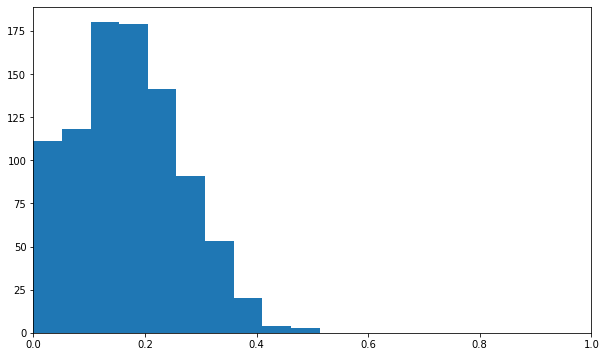

In [24]:
model5 = wom(agents=.8, threshold=(.17,.1), net_dim=30)
model5.simulate(iters = 50, ic=((10,10,0),(25,12,0),(3,27,0),))
model5.describe_model()

In [25]:
interactive_plot = widgets.interactive(model5.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=model5.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t', max=50), Checkbox(value=False, description='labels')…

Závěry:
- roztroušení iniciátoři ovlivní hodně ostatních jen tehdy, pokud je průměrný threshold nízký 
- pokud je průměrný threshold vysoký, musí být iniciátoři koncentrovaní, aby hromadné šíření začalo
- agenti mají informace jen o svém blízkém okolí, "skupina" iniciátorů se jim ten zdá větší než ve skutečnosti je

Zdroje:

[1] Brudermann, Thomas & Fenzl, Thomas. (2009). Word-of-mouth Advertising: An Agent-based Modelling Approach.  
